In [ ]:
'''2. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a.
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion
matrix.'''

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [9]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 16s 1us/step


In [10]:
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Optional: Reduce dataset size to prevent MemoryError
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:2000]
y_test = y_test[:2000]

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255


In [11]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [12]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)

Epoch 1/10


40/40 [==============================] - 4s 46ms/step - loss: 1.1454 - accuracy: 0.6426 - val_loss: 0.3879 - val_accuracy: 0.8895
Epoch 2/10
40/40 [==============================] - 1s 37ms/step - loss: 0.3566 - accuracy: 0.8936 - val_loss: 0.2417 - val_accuracy: 0.9235
Epoch 3/10
40/40 [==============================] - 2s 39ms/step - loss: 0.2439 - accuracy: 0.9285 - val_loss: 0.1974 - val_accuracy: 0.9415
Epoch 4/10
40/40 [==============================] - 1s 34ms/step - loss: 0.1825 - accuracy: 0.9451 - val_loss: 0.1660 - val_accuracy: 0.9520
Epoch 5/10
40/40 [==============================] - 1s 33ms/step - loss: 0.1586 - accuracy: 0.9513 - val_loss: 0.1462 - val_accuracy: 0.9580
Epoch 6/10
40/40 [==============================] - 1s 35ms/step - loss: 0.1349 - accuracy: 0.9614 - val_loss: 0.1322 - val_accuracy: 0.9645
Epoch 7/10
40/40 [==============================] - 2s 40ms/step - loss: 0.1249 - accuracy: 0.9636 - val_loss: 0.1377 - val_accuracy: 0.9620
Epoch 8/10


In [15]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09228865057229996
Test accuracy: 0.9714999794960022


In [16]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

63/63 [==============================] - 1s 6ms/step


In [17]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

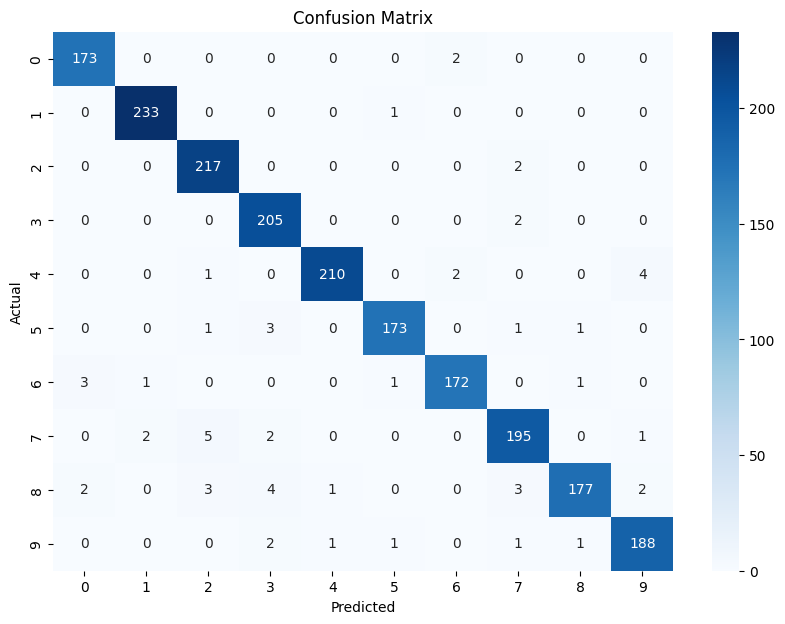

In [18]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.99      1.00      0.99       234
           2       0.96      0.99      0.97       219
           3       0.95      0.99      0.97       207
           4       0.99      0.97      0.98       217
           5       0.98      0.97      0.97       179
           6       0.98      0.97      0.97       178
           7       0.96      0.95      0.95       205
           8       0.98      0.92      0.95       192
           9       0.96      0.97      0.97       194

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

